<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 11</h1>
</div>

# 1. Representing graphs

## Why are graphs useful?

Lots of problems reduce to graph problems
* The Internet is a graph (Shortest path, min/max flow) (how many devices on the internet?)
* The Web is a graph (crawlers) (how many web pages on the internet?)
* Social networks are graphs (graph degrees, k-connectivity)
* Logistics hubs and transportation are graphs (Traveling salesman, subway and bus schedules)
* Computer scheduling, GSM frequency scheduling (Graph coloring)
* Medical school residency assignments (stable marriage algorithm)
* And many others....

## What types of graphs are there?

* Directed vs Undirected
* Weighted
* Special
  * Tree (no cycles)
  * Rooted tree (very common and useful, includes heaps, b-trees, tries etc).
  * DAG (most workflows are DAGs)
  * Bi-partite (can be separate to 2 sides with all edges crossing sides)
  * Cliques

## Graph representations: various options

* What information we want to access

* What efficiency required

<div align="center">
    <img src="graph.svg" alt="[sample image]">
</div>

**Today:**

* Edges List
* Vertex Adjacency lists 
* Vertex Adjacency matrix 



Focus on undirected graphs:
 * easy to adjust for directed

## Edges List
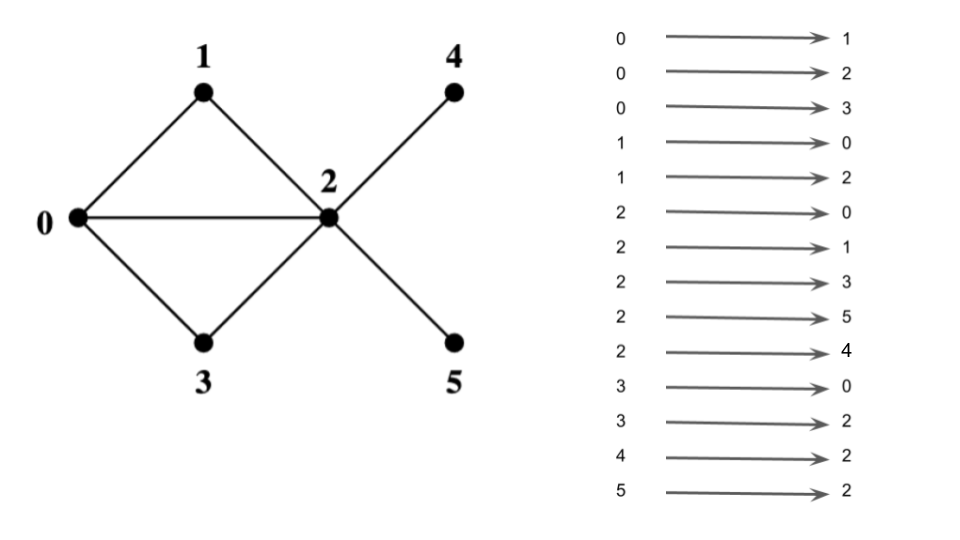

* List of directed or undirected edges
* Can be sorted/ordered for easier access/discovery
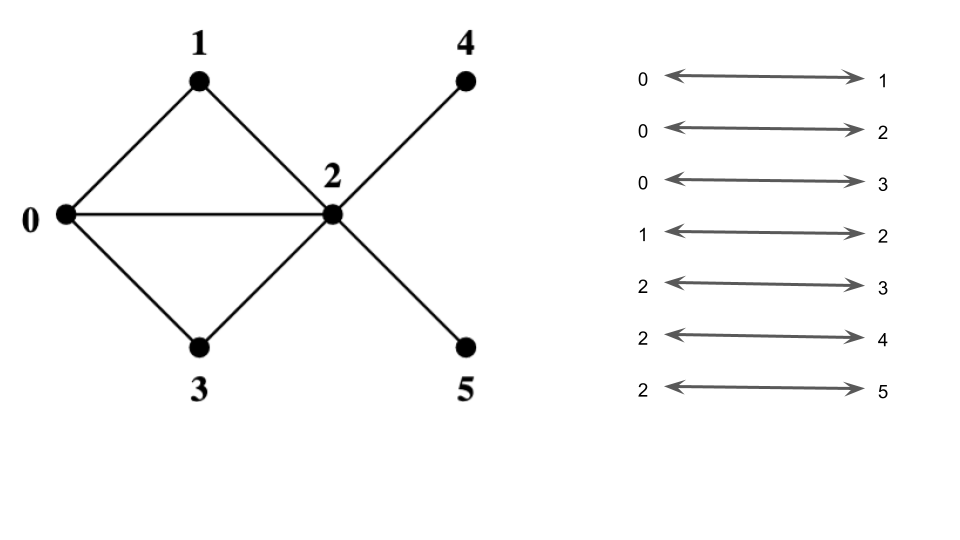

In [23]:
// number of vertices
let n : usize = 6;

// list of edges
let edges : Vec<(usize,usize)> = vec![(0,1), (0,2), (0,3), (1,2), (2,3), (2,4), (2,5)];
println!("{:?}", edges);
println!("{:?}",edges.binary_search(&(2,3)));
println!("{:?}",edges.binary_search(&(1,3)));

[(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2, 4), (2, 5)]
Ok(4)
Err(4)


## Adjacency lists

For each vertex, store the list of its neighbors

<br>
<div align="center">
<img src="sparse.png" alt="[sample graph]">
</div>

Collection:
 * classical approach: linked list
 * vectors

In [33]:
let mut graph_list : Vec<Vec<usize>> = vec![vec![];n];
for (v,w) in edges.iter() {
    graph_list[*v].push(*w);
    graph_list[*w].push(*v);
};
for i in 0..graph_list.len() {
    println!("{}: {:?}", i, graph_list[i]);
};
println!("{:?}", graph_list[2].binary_search(&3));
println!("{:?}", graph_list[1].binary_search(&3));

0: [1, 2, 3]
1: [0, 2]
2: [0, 1, 3, 4, 5]
3: [0, 2]
4: [2]
5: [2]
Ok(2)
Err(2)


## Adjacency matrix

* $n$ vertices

* $n \times n$ matrix

* For each pair of vertices, store a boolean value: edge present or not

<div align="center">
<img src="dense.svg" alt="sample dense graph">
</div>

In [28]:
let mut graph_matrix = vec![vec![false;n];n];
for (v,w) in edges.iter() {
    graph_matrix[*v][*w] = true;
    graph_matrix[*w][*v] = true; 
};
for row in &graph_matrix {
    for entry in row.iter() {
        print!(" {} ",if *entry {"1"} else {"0"});
    }
    println!("");
};
println!("{}", graph_matrix[2][3]);
println!("{}", graph_matrix[1][3]);

 0  1  1  1  0  0 
 1  0  1  0  0  0 
 1  1  0  1  1  1 
 1  0  1  0  0  0 
 0  0  1  0  0  0 
 0  0  1  0  0  0 
true
false


## Sample graph


<div align="center">
    <img src="graph.svg" alt="[sample image]">
</div>

This lecture's graphs:
* undirected
* no self-loops
  * self-loop: edge connecting a vertex to itself
* no parallel edges (connecting the same pair of vertices)

Simplifying assumption:
* $n$ vertices labeled $0\ldots n-1$

## Adjacency list representation

<div align="center">
List of neighbors for each vertex
</div><br><br>

<img src="sparse.svg" alt="[adjacency lists]">


In [4]:
// number of vertices
let n : usize = 6;

// list of edges
let edges : Vec<(usize,usize)> = vec![(0,1), (0,2), (0,3), (1,2), (2,3), (2,4), (2,5)];
let mut graph_list : Vec<Vec<usize>> = vec![vec![];n];
for &(v,w) in edges.iter() {
    graph_list[v].push(w);
    graph_list[w].push(v);
};
for i in 0..graph_list.len() {
    println!("{}: {:?}", i, graph_list[i]);
};

0: [1, 2, 3]
1: [0, 2]
2: [0, 1, 3, 4, 5]
3: [0, 2]
4: [2]
5: [2]


## Adjacency matrix representation

<div align="center">
Matrix of Boolean values
</div>

<br>
<img src="dense.svg" alt="[adjacency matrix]">

In [5]:
let mut graph_matrix = vec![vec![false;n];n];

In [6]:
for (v,w) in edges.iter() {
    graph_matrix[*v][*w] = true;
    graph_matrix[*w][*v] = true; 
};

In [7]:
for row in &graph_matrix {
    for entry in row.iter() {
        print!(" {} ",if *entry {"1"} else {"0"});
    }
    println!("");
};

 0  1  1  1  0  0 
 1  0  1  0  0  0 
 1  1  0  1  1  1 
 1  0  1  0  0  0 
 0  0  1  0  0  0 
 0  0  1  0  0  0 


## What if labels are not in $\{0,1,\ldots n-1\}$?
`T`${}={}$type of labels

**Solution 1:** Map everything to this range
  * Create hash maps from input labels to $\{0,1,\ldots n-1\}$
  * Create a reverse hash map to recover labels when needed

**Solution 2:** Replace with hash maps and hash sets
  * Adjacency lists: use `HashMap<T,Vec<T>>`
  * Adjacency matrix: use `HashSet<(T,T)>`


  * Bonus gain: `HashSet<(T,T)>` better than adjacency matrix for sparse graphs

## What if the graph is directed?

**Adjacency lists:**
* separate lists incoming/outgoing edges
* depends on what information needed for your algorithm


**Adjacency matrix:**
* example: edge $u \rightarrow v$ and no edge in the opposite direction:
  * `matrix[u][v] = true`
  * `matrix[v][u] = false`


# 1. Representing graphs: examples in Rust
# <font color="red">2. Sample graph algorithms</font>


## Count triangles

**Problem to solve:** Consider all triples of vertices. What is the number of those in which all vertices are connected?  And alternatively how many unique triangles does a vertex belong to?
* Why is this important?  Turns out that hosts that contain spam pages have a very different triangle patterns then regular hosts (https://chato.cl/papers/becchetti_2007_approximate_count_triangles.pdf)
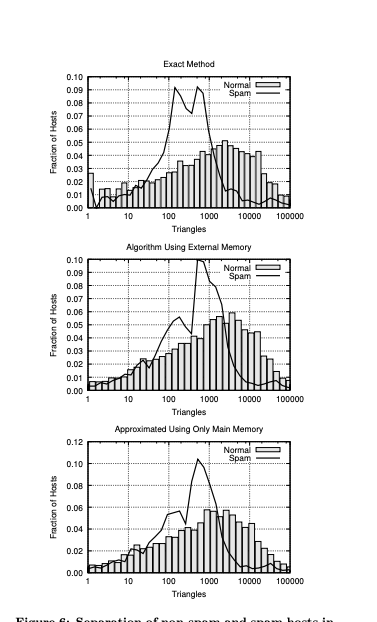
* Also clustering coefficients in social networks: https://cs.stanford.edu/~rishig/courses/ref/l1.pdf

Solution 1: Enumerate explicitly over all triples and check which are triangles, using the adjacency matrix

In [34]:
let mut count: u32 = 0;
let mut coefficients: Vec<u32> = vec![0;n];
for u in 0..n {
    for v in u+1..n {
        for w in v+1..n {
            if (graph_matrix[u][v] && graph_matrix[v][w] && graph_matrix[w][u]) {
                count += 1;
                coefficients[u] += 1;
                coefficients[v] += 1;
                coefficients[w] += 1;
            }
        }
    }
}
println!("{}", count);
println!("{:?}", coefficients);

2
[2, 1, 2, 1, 0, 0]


### Complexity of the algorithm above $O(n^3)$

## Count triangles

**Problem to solve:** Consider all triples of vertices. What is the number of those in which all vertices are connected?

**Solution 2:** Follow links from each vertex to see if you come back in three steps

In [35]:
let mut count: u32 = 0;
for u in 0..n {
    for v in &graph_list[u] {
        for w in &graph_list[*v] {
            for u2 in &graph_list[*w] {
                if u == *u2 {
                    count += 1;
                    break;
                }
            }
        }
    }
}
count

12

In [36]:
// need to divide by 6
// due to symmetries triangles counted multiple times
count / 6

2

### Complexity of the algorithm above $O(n^4)$ if everyone connected to everyone else but if degree is low then this is $O(n*m)$
### Why didn't we need the division in the matrix version of the algorithm?

## Count triangles

**Problem to solve:** Consider all triples of vertices. What is the number of those in which all vertices are connected?

Different implementation of solution 2

In [37]:
fn walk(current:usize,destination:usize,steps:usize,adjacency_list:&Vec<Vec<usize>>) -> u32 {
    match steps {
        0 => if current == destination {1} else {0},
        _ => {
            let mut count = 0;
            for v in &adjacency_list[current] {
                count += walk(*v,destination,steps-1,adjacency_list);
            }
            count
        }
    }
}

In [38]:
let mut count = 0;
for v in 0..n {
    count += walk(v,v,3,&graph_list);
}
count / 6

2

## Count triangles

**Problem to solve:** Consider all triples of vertices. What is the number of those in which all vertices are connected?

**Solution 3:** For each vertex try all pairs of neighbors (via adjacency lists) and see if they are connected (via adjacency matrix)

In [39]:
let mut count: u32 = 0;
for u in 0..n {
    let neighbors = &graph_list[u];
    for v in neighbors {
        for w in neighbors {
            if graph_matrix[*v][*w] {
                count += 1;
            }
        }
    }
}
count / 6

2